## OP Learning Agenda: SF Class of 2014

A project to determine what, if anything, influenced the graduation success of the San Francisco class of 2014.

### Abstract

The SF Class of 2014 is currently the highest performing CT class in terms of 5 year college graduation rate. They almost certainly will be have the 6 year graduation rate at the end of FY20. This report investigated what variables might have influenced this classes success, and if any of those indicators are something which could be encouraged at other CT sites. 

While it is true the Class of 2014 will have the highest graduation rate, almost more notable is the jump in graduation rates from 2012 to 2013. In some senses, the class of 2014 was just continuing the impressive results their seniors started. However, given the small sample sizes for any given College Track cohort, it is difficult to draw conclusions on the statistical significance of these increases. In fact, looking at the t-test results indicated that the difference in graduation rates could not be considered pure randomness. 

That being said, it still is important to understand if any factors seemed different among these students that might have had a correlation with graduation rates. When considering the data available, 11th grade GPA, first year of College GPA, and, more interesting, students total bank book earnings, seemed to play an important role in graduation success. 

Other factors considered, but yield mixed or negligible results include: 
* First Gen Status
* Low Income
* Ethnic Background
* ACT scores
* High School Attended* 
* College Fit Type

\* For high school attended, there was a positive correlation with students who attended Lowell High School

Finally, the switch to site based advising occurred around this time...TO BE COMPLETED




In [163]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import statsmodels.api as sm
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')



In [164]:
%matplotlib inline

In [165]:
today = datetime.today()
in_file = Path.cwd() / "data" / "processed" / "processed_data.pkl"
report_dir = Path.cwd() / "reports"
report_file = report_dir / "Excel_Analysis_{today:%b-%d-%Y}.xlsx"

in_file2 = Path.cwd() / "data" / "processed" / "processed_data_file2.pkl"

in_file3 = Path.cwd() / "data" / "processed" / "processed_data_file3.pkl"

In [166]:
df = pd.read_pickle(in_file)

df2 = pd.read_pickle(in_file2)

df3 = pd.read_pickle(in_file3)

In [167]:
def sf_cross_tab(df, column, normalize="index", margins=True):
    return pd.crosstab(
        df[df.site == "San Francisco"].high_school_class,
        df[df.site == "San Francisco"][column],
        normalize=normalize,
        margins=margins,
    )

##  General Distributions

SF Class of 2014 is on track to have the highest 6 year grad rate, with almost 70% of students already graduating, but that number isn't significantly higher than the class of 2013. Though we do see a reasonably big jump from 2012 to 2013. 



#### Table 1. San Francisco 6 Year Graduation Rate by High School Class 

In [7]:
# Grad Rate Less than 6 years

grad_rate_6_year = sf_cross_tab(
    df, "graduated_4_year_degree_less_6_years").round(2)

grad_rate_6_year

graduated_4_year_degree_less_6_years,False,True
high_school_class,,
2011,0.53,0.47
2012,0.45,0.55
2013,0.32,0.68
2014,0.30,0.70
All,0.39,0.61


#### Table 2. San Francisco 6 Year Graduation Count by High School Class 


In [8]:
grad_numbers_6_year = sf_cross_tab(df, "graduated_4_year_degree_less_6_years", normalize=False).round(2)

grad_numbers_6_year

graduated_4_year_degree_less_6_years,False,True,All
high_school_class,,,
2011,18,16,34
2012,19,23,42
2013,12,25,37
2014,16,37,53
All,65,101,166


#### Table 3. San Francisco 5 Year Graduation Rate by High School Class

To be more accurate, we can look at the 5 year grad rate, but this tells essentially the same story.

In [9]:
grad_rate_5_year = sf_cross_tab(df, "graduated_4_year_degree_less_5_years").round(2)

grad_rate_5_year


graduated_4_year_degree_less_5_years,False,True
high_school_class,,
2011,0.53,0.47
2012,0.48,0.52
2013,0.32,0.68
2014,0.30,0.70
All,0.40,0.60


### Statistical Test

If we run an independent t-test on the 5 year graduation rates, we see that the class of 2014 is not statistically higher than the class of 2013, or 2012. 

#### P Value from t-test comparing 2014 -> 2013

In [10]:
population1_test_1 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2013)][
        "graduated_4_year_degree_less_5_years"
    ]
).values


population2_test_1 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2014)][
        "graduated_4_year_degree_less_5_years"
    ]
).values

In [12]:
# p value of independent t-test on populations above
(round(sm.stats.ttest_ind(population1_test_1, population2_test_1)[1], 2))

0.82

#### P Value from t-test comparing 2014 -> 2012 

In [31]:
population1_test_2 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2012)][
        "graduated_4_year_degree_less_5_years"
    ]
).values


population2_test_2 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2014)][
        "graduated_4_year_degree_less_5_years"
    ]
).values

In [80]:
(round(sm.stats.ttest_ind(population1_test_2, population2_test_2)[1], 2))

0.08

#### P Value from t-test comparing 2014 -> 2011
Note, this value is < 0.5

In [33]:
population1_test_3 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2011)][
        "graduated_4_year_degree_less_5_years"
    ]
).values


population2_test_3 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2014)][
        "graduated_4_year_degree_less_5_years"
    ]
).values

In [81]:
(round(sm.stats.ttest_ind(population1_test_3, population2_test_3)[1], 2))

0.03

### Other Distributions

Based on the above results, I don't believe we can say that the class of 2014 was notably higher that previous classes. It does however appear there is an upswing in graduation rate that has been increasing since 2011, with a decent jump from 2012 -> 2013 (though not a statistically significant one).

With that in mind, here are other notable differences in the high school class distributions which might indicate changes that are influencing the graduation rate 

#### 11th Grade College Eligibility GPA

This is the most notable distribution change, with the class of 2014 having by far the highest 11th grade GPAs, with almost 75% of that student group having over a 3.0. Compared to 53% from the class of 2013 (the next highest)

In [83]:
gpa_buckets = sf_cross_tab(df, "gpa_bucket", margins=False).round(2)



gpa_buckets

gpa_bucket,2.5 - 2.74,2.5 or less,2.75 - 2.9,3.0 - 3.49,3.5 or greater
high_school_class,,,,,
2011,0.06,0.50,0.12,0.12,0.21
2012,0.02,0.43,0.10,0.21,0.24
2013,0.19,0.14,0.14,0.24,0.30
2014,0.09,0.13,0.04,0.25,0.49


#### CT Entrance Diagnostics Math Scores
If we look at each high school classes incoming CT math diagnostics scores, we also see that the class of 2014 had the highest percent of students either "Ready" or "Near Ready." Noteworthy though, is the class of 2013 did not have any appreciable differences from the class of 2012. 

In [48]:
entrace_scores = df3[df3.version == "Entrance into CT Diagnostic"]

In [84]:
entrance_scores = sf_cross_tab(entrace_scores, "act_math_readiness", margins=False).round(2)

entrance_scores

act_math_readiness,1. Ready,2. Near Ready,3. Not Ready
high_school_class,,,
2012,0.33,0.11,0.56
2013,0.27,0.17,0.57
2014,0.36,0.23,0.41


#### Pearson Correlation Coefficient for key continuous data points (SF - all classes)

Below is the correlation matrix for key continuous variables that might influence college graduation. For the purposes here, only the first column is displays relevant information. 

We can see that GPA in general plays the largest factor, with 11th grade and the first year of college particularly important. Somewhat surprising, was the role bank book earnings played, second only to 11th grade gpa. 

Note - there are no notable differences between the Pearson Coefficient and the Spearman Coefficient


In [200]:
# cleaning up column types (needs to be moved to data prep)

# changing act_math to an int
df['act_mathematics'] = pd.to_numeric(df['act_mathematics'], errors='coerce')

# changing bank book earnings to an int
df['total_bb_earnings_as_of_hs_grad'] = df['total_bb_earnings_as_of_hs_grad'].replace(
    '[\$,]', '', regex=True).astype(float)

# changing gpa data to int
df[['9th Grade', '10th Grade', '11th Grade',
    '12th Grade', 'Year 1', 'Year 2', 'Year 3',
    'Year 4', 'Year 5', 'Year 6']] = df[
    ['9th Grade', '10th Grade', '11th Grade',
     '12th Grade', 'Year 1', 'Year 2', 'Year 3',
     'Year 4', 'Year 5', 'Year 6']].apply(pd.to_numeric, errors='coerce')

In [201]:
# creating a subset df that is just San Francisco
df_sub = df[df.site == "San Francisco"].dropna(subset=['act_mathematics'])


In [202]:
corrMatrix = df_sub[['graduated_4_year_degree_less_5_years', '9th Grade', '10th Grade',
                     '11th Grade', '12th Grade', 'Year 1', 'Year 2', 'Year 3',
                     'Year 4', 'Year 5', 'indicator_first_generation', 'indicator_low_income',
                     'total_bb_earnings_as_of_hs_grad', 'act_mathematics']].corr(method='pearson')

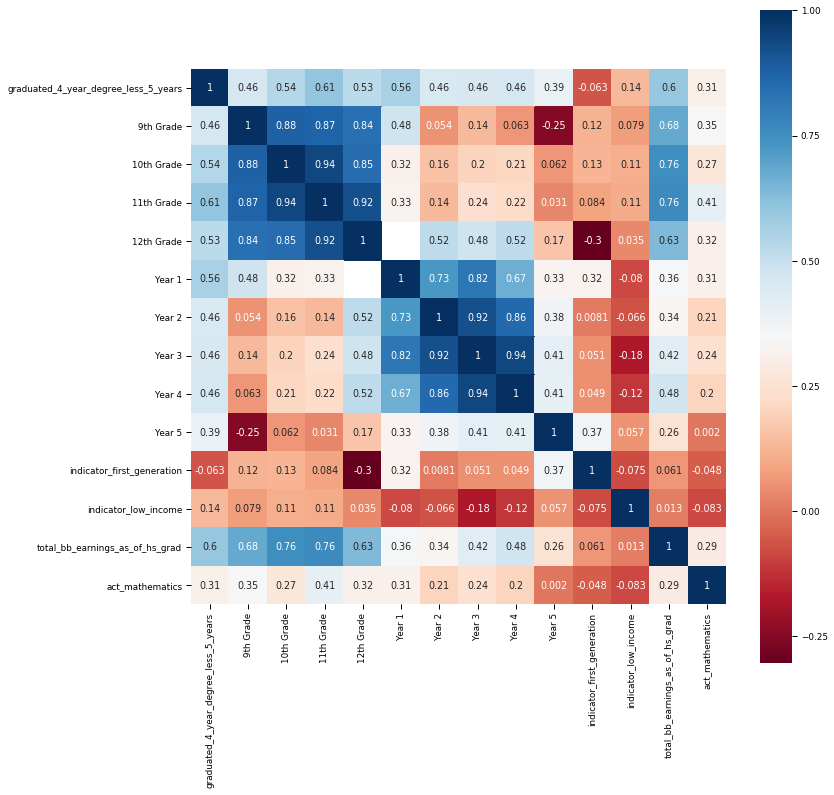

In [315]:
f, ax = plt.subplots(figsize=(12, 12))
sns.set_context('paper')


ax = sns.heatmap(corrMatrix, vmax=1, square=True, annot=True,  cmap="RdBu")


#### Logistic Regression on Categorical Variables (All SF Classes)

Below is the logistic regression result on the following key categorical variables: 

* High School Attended

* Ethnic Background

* College Fit type (using the fit type of the first school attended)



All three of these test yielded mixed results with no clear indicator of strong correlation.

Only three high schools showed statistically significant values, Lowell, Balboa, and City Arts and Tech, with Lowell being the only one that had a positive influence on students. As a note, prior to this analysis I spoke with Miccaela Montague and she indicated this likely would be the case. 


For ethnic background, only Asian Americans had a small p value, but the "R squared is still quite low and the overall sample size for any individual ethnicity is low. 

Finally, fit type yielded minimal results with. The sample size for Best Fit schools was very small, with almost all the students being marked as attending a Good Fit school. 

As a note, for all of these the sample size was quite low.



In [171]:
def C1(cat):
     return pd.get_dummies(cat, drop_first=True)

In [294]:
mod = smf.logit(formula= "C1(graduated_4_year_degree_less_5_years) ~ C(school)", data=df_sub).fit(method='bfgs', maxiter=100)
mod.summary()

Optimization terminated successfully.
         Current function value: 0.433565
         Iterations: 77
         Function evaluations: 78
         Gradient evaluations: 78


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      Logit Regression Results                                      
====================================================================================================
Dep. Variable:     C1(graduated_4_year_degree_less_5_years)   No. Observations:                  402
Model:                                                Logit   Df Residuals:                      380
Method:                                                 MLE   Df Model:                           21
Date:                                      Wed, 11 Mar 2020   Pseudo R-squ.:                  0.3259
Time:                                              16:37:55   Log-Likelihood:                -174.29
converged:                                             True   LL-Null:                       -258.56
Covariance Type:                                  nonrobust   LLR p-value:                 4.934e-25
===============================================================================================================================================
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       0.8486      0.345      2.459      0.014       0.172       1.525
C(school)[T.Asawa (Ruth) San Francisco School Of The Arts, A Public School]   -27.5357   1.56e+05     -0.000      1.000   -3.06e+05    3.06e+05
C(school)[T.Balboa High School]                                                -1.0718      0.519     -2.066      0.039      -2.089      -0.055
C(school)[T.Bridgemont High School]                                           -13.0565    223.812     -0.058      0.953    -451.720     425.607
C(school)[T.City Arts And Tech High School]                                    -1.2546      0.572     -2.192      0.028      -2.376      -0.133
C(school)[T.Crystal Springs Uplands School]                                   -13.0565    223.812     -0.058      0.953    -451.720     425.607
C(school)[T.Drew School]                                                        9.7125     98.242      0.099      0.921    -182.838     202.263
C(school)[T.El Camino High School]                                             -0.8495      0.787     -1.080      0.280      -2.392       0.693
C(school)[T.Galileo High School]                                                0.2500      0.673      0.372      0.710      -1.068       1.568
C(school)[T.Gateway High School]                                               -0.1559      0.554     -0.282      0.778      -1.241       0.929
C(school)[T.Immaculate Conception Academy]                                    -13.0565    223.812     -0.058      0.953    -451.720     425.607
C(school)[T.Jordan (June) School For Equity]                                  -10.9177     88.705     -0.123      0.902    -184.777     162.942
C(school)[T.KIPP Bridge Charter School]                                         0.1629      0.452      0.360      0.718      -0.723       1.049
C(school)[T.Lowell High School]                                                 0.8253      0.467      1.767      0.077      -0.090       1.741
C(school)[T.Marshall (Thurgood) High School]                                   31.0381   1.33e+06   2.34e-05      1.000    -2.6e+06     2.6e+06
C(school)[T.Mercy High School]                                                -13.0565    223.812     -0.058      0.953    -451.720     425.607
C(school)[T.Mission High School]                                              -19.5303   4028.469     -0.005      0.996   -7915.185    7876.125
C(school)[T.S.F. International High School]                                     9.7125     98.242      0.099      0.921    -182.838     202.263
C(school)[T.San Fra

In [307]:
mod = smf.logit(formula= "C1(graduated_4_year_degree_less_5_years) ~ C(ethnic_background) - 1 ", data=df_sub).fit(method='bfgs', maxiter=100)
mod.summary()

Optimization terminated successfully.
         Current function value: 0.538421
         Iterations: 55
         Function evaluations: 56
         Gradient evaluations: 56


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      Logit Regression Results                                      
====================================================================================================
Dep. Variable:     C1(graduated_4_year_degree_less_5_years)   No. Observations:                  402
Model:                                                Logit   Df Residuals:                      396
Method:                                                 MLE   Df Model:                            5
Date:                                      Wed, 11 Mar 2020   Pseudo R-squ.:                  0.1629
Time:                                              16:47:54   Log-Likelihood:                -216.45
converged:                                             True   LL-Null:                       -258.56
Covariance Type:                                  nonrobust   LLR p-value:                 1.089e-16
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.0458      0.175     -0.262      0.793      -0.388       0.297
C(ethnic_background)[T.Asian-American]       2.4129      0.349      6.917      0.000       1.729       3.097
C(ethnic_background)[T.Latino / Chicano]     0.2281      0.276      0.825      0.409      -0.314       0.770
C(ethnic_background)[T.Multiracial]         -0.1774      0.425     -0.417      0.676      -1.010       0.655
C(ethnic_background)[T.Other]               12.3571    166.653      0.074      0.941    -314.277     338.991
C(ethnic_background)[T.Pacific Islander]     0.0460      0.728      0.063      0.950      -1.382       1.474
============================================================================================================
"""

In [306]:
mod = smf.logit(formula= "C1(graduated_4_year_degree_less_5_years) ~ C(fit_type)-1", data=df_sub).fit(method='bfgs', maxiter=100)
mod.summary()

Optimization terminated successfully.
         Current function value: 0.565263
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      Logit Regression Results                                      
====================================================================================================
Dep. Variable:     C1(graduated_4_year_degree_less_5_years)   No. Observations:                  247
Model:                                                Logit   Df Residuals:                      244
Method:                                                 MLE   Df Model:                            2
Date:                                      Wed, 11 Mar 2020   Pseudo R-squ.:                 0.07926
Time:                                              16:47:44   Log-Likelihood:                -139.62
converged:                                             True   LL-Null:                       -151.64
Covariance Type:                                  nonrobust   LLR p-value:                 6.032e-06
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(fit_type)[Best Fit]    14.3938    333.813      0.043      0.966    -639.868     668.655
C(fit_type)[Good Fit]     1.0590      0.177      5.984      0.000       0.712       1.406
C(fit_type)[None]              0      0.250          0      1.000      -0.490       0.490
=========================================================================================
"""

## SF Compared to Other Sites




In [1]:
%%html

<script>
$(document).ready(function(){
    window.code_toggle = function() {
        (window.code_shown) ? $('div.input').hide(250) : $('div.input').show(250);
        window.code_shown = !window.code_shown
    }
    if($('body.nbviewer').length) {
        $('<li><a href="javascript:window.code_toggle()" title="Show/Hide Code"><span class="fa fa-code fa-2x menu-icon"></span><span class="menu-text">Show/Hide Code</span></a></li>').appendTo('.navbar-right');
        window.code_shown=false;
        $('div.input').hide();
    }
});
</script>


<style>

div.prompt {display:none}


h1, .h1 {
    font-size: 33px;
    font-family: "Trebuchet MS";
    font-size: 2.5em !important;
    color: #2a7bbd;
}

h2, .h2 {
    font-size: 10px;
    font-family: "Trebuchet MS";
    color: #2a7bbd; 
    
}


h3, .h3 {
    font-size: 10px;
    font-family: "Trebuchet MS";
    color: #5d6063; 
    
}

.rendered_html table {

    font-size: 14px;
}

.output_png {
  display: flex;
  justify-content: center;
}



</style>